<a href="https://colab.research.google.com/github/abhisheksaxena1998/packages/blob/master/wp_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install twitterscraper

     |████████████████████████████████| 92kB 4.6MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.4.0-cp36-none-any.whl size=11347 sha256=9d3e8b894fa763a1ee6fdcf7cb2abe3f6f02a393262b4082a3212a1d6dcb88af
  Stored in directory: /root/.cache/pip/wheels/c2/9c/8b/7393e7bdc8abe6ce0d46c2ffae2035a1a2080a97ff0ddbdde6
Successfully built twitterscraper


In [3]:
import pandas as pd
import datetime as dt 
from twitterscraper import query_tweets
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re

INFO: {'User-Agent': 'Mozilla/5.0 (Windows NT 5.2; RW; rv:7.0a1) Gecko/20091211 SeaMonkey/9.23a1pre'}


2019
05
01
2019
10
31
Anna Soubry


INFO: queries: ['Anna Soubry since:2019-05-01 until:2019-05-10', 'Anna Soubry since:2019-05-10 until:2019-05-19', 'Anna Soubry since:2019-05-19 until:2019-05-28', 'Anna Soubry since:2019-05-28 until:2019-06-06', 'Anna Soubry since:2019-06-06 until:2019-06-15', 'Anna Soubry since:2019-06-15 until:2019-06-24', 'Anna Soubry since:2019-06-24 until:2019-07-04', 'Anna Soubry since:2019-07-04 until:2019-07-13', 'Anna Soubry since:2019-07-13 until:2019-07-22', 'Anna Soubry since:2019-07-22 until:2019-07-31', 'Anna Soubry since:2019-07-31 until:2019-08-09', 'Anna Soubry since:2019-08-09 until:2019-08-18', 'Anna Soubry since:2019-08-18 until:2019-08-27', 'Anna Soubry since:2019-08-27 until:2019-09-06', 'Anna Soubry since:2019-09-06 until:2019-09-15', 'Anna Soubry since:2019-09-15 until:2019-09-24', 'Anna Soubry since:2019-09-24 until:2019-10-03', 'Anna Soubry since:2019-10-03 until:2019-10-12', 'Anna Soubry since:2019-10-12 until:2019-10-21', 'Anna Soubry since:2019-10-21 until:2019-10-31']
INFO

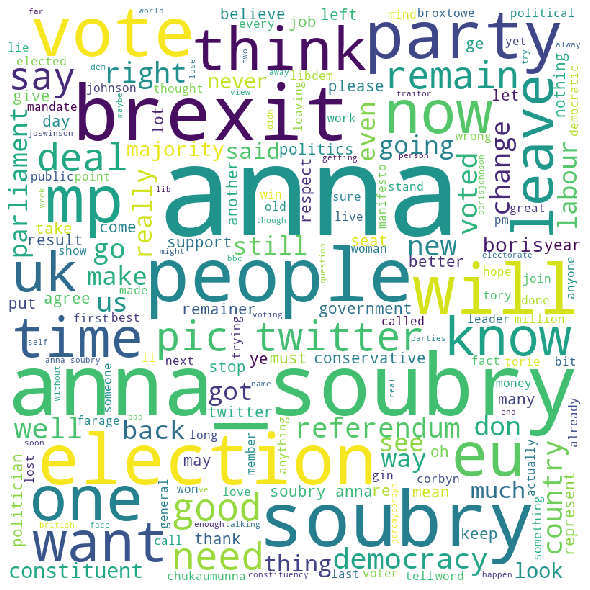

In [5]:


# taking necessary input like date range , topic string to search 
start_y=int(input())
start_m=int(input())
start_d=int(input())
end_y=int(input())
end_m=int(input())
end_d=int(input())
search_topic=input()
# default language is english
lang= 'english'

#assigning dates , querying the tweets using the imported packeges

begin_date=dt.date(start_y,start_m,start_d)
end_date=dt.date(end_y,end_m,end_d)
limit=10000
tweet_data=query_tweets(search_topic,begindate=begin_date , enddate=end_date, limit=limit ,lang=lang)

# creating a csv file of collected tweets data
df=pd.DataFrame(obj.__dict__ for obj in tweet_data)
#df.drop(['timestamp_epochs','html'],axis=1)
df.to_csv('Anna.csv')

comment_words=' '
stopwords = set(STOPWORDS) 
for val in df['text']:
    t=set()
    val = re.sub('https?://[A-Za-z0-9./]+','',val) 
    tokens = val.split()  
    for word in tokens:
      t.add(word.lower())
    t=list(t)  
    for words in t: 
        comment_words = comment_words + words + ' '
   
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                          
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()